## Predicting heart disease using machine learning
This notebook looks into using python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

### 1. Problem Defination
Given clinical parameters about a patient, can we predict whether or not they have heart disease?


### 2. Data
We can get data from the internet (from kaggle,etc)
This is also the link for data that we will be using https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv


### 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof concept, we'll pursue the project.

### 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#### Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.



In [4]:
# import all the tools that we need

# regular EDA( xploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline   

# models from scikit learn
# it is a linear model for classification rather than regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

### Load data

In [5]:
df = pd.read_csv ("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

In [6]:
df.shape  # rows and columns

(303, 14)

### Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about data and become a subject matter expert on the dataset you're working with.
There is no set method to do this.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# finding out how many of each class are there
df["target"].value_counts()

# this have relatively similar values. So this is a balanced classification problem

1    165
0    138
Name: target, dtype: int64

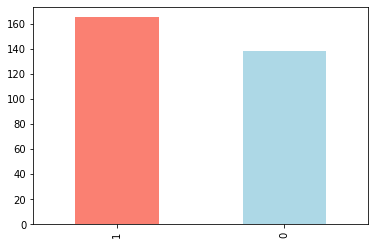

In [10]:
# ploting target values

df["target"].value_counts().plot(kind="bar", color=["salmon" , "lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# are there any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease frequency according to sex

In [16]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

# according to this there is 75% chance that women has heart disease and 50% chance that men has heart disease
# and there is 62.5% chance that any patient ( male/female ) has heart disease

sex,0,1
target,,
0,24,114
1,72,93


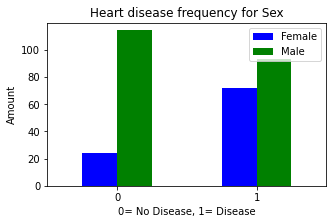

In [43]:
# create a plot of crosstab
pd.crosstab(df.target , df.sex).plot(kind="bar", figsize=(5,3), color=["blue","green"])

plt.title("Heart disease frequency for Sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);        # this will rotate the 0 and 1 on x-axis

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

#### Age vs Max heart rate for heart disease

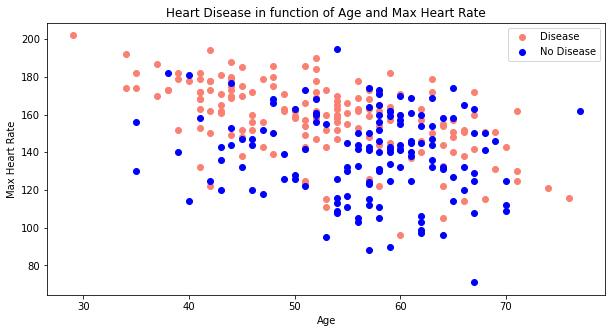

In [65]:
# creating another figure
plt.figure(figsize=(10,5))

#scatte with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target ==1],
           color="salmon");

# scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target ==0],
           color="blue");

# add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

In [57]:
df[df.thalach>=200]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [61]:
df[df.age<35]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


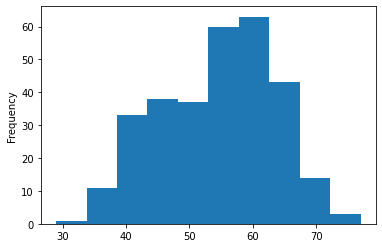

In [67]:
# check the distribution (spread of data) of the age column with a histogram
df.age.plot.hist();

# it has almost normal distribution

#### Heart Disease frequency per chest pain type
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [71]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


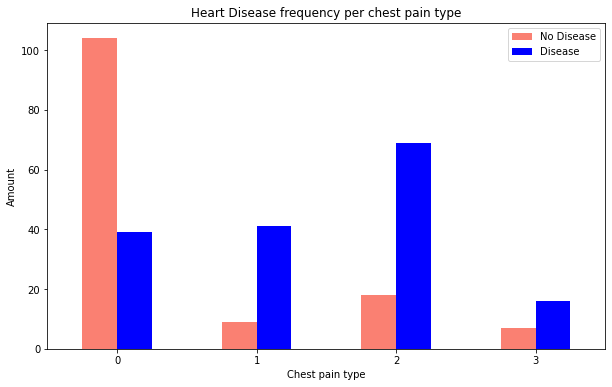

In [75]:
# make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6), color = ["salmon", "blue"])

# add some Communication
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
# make a correlation matrix. Comparing each column with each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


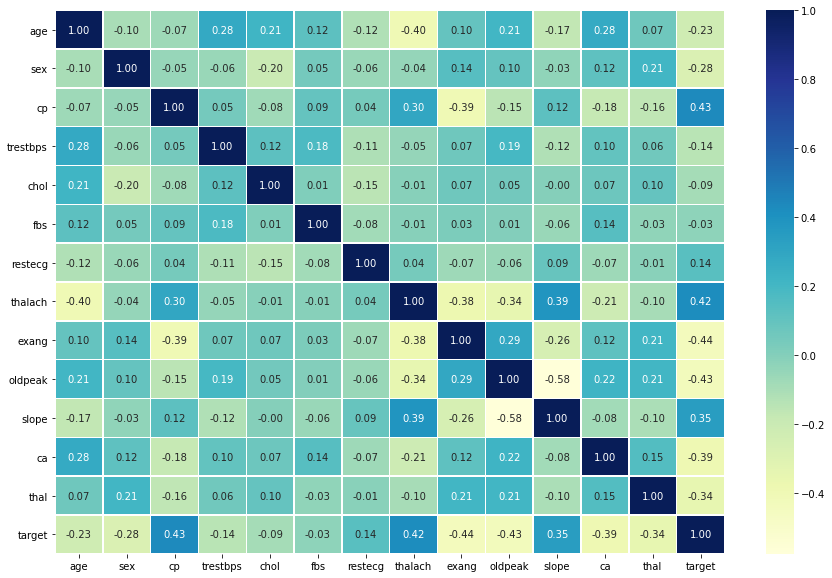

In [84]:
# Let's make our correlation matrix visible
corr_matrix = df.corr()

fig ,ax = plt.subplots(figsize=(15,10))

ax= sns.heatmap(corr_matrix ,
                annot =True , 
                linewidth = 0.5 ,
                fmt = ".2f",
                cmap = "YlGnBu");

# positive coorelation means if one value/attribute goes up the other value/attribute will also go up. Similar to directly proportional
# negative coorelation means if one value/attribute goes up the other value/attribute will also go down. Similar to inversely proportional

#### Modeling

In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
# split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [88]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [89]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [90]:
np.random.seed(42)

# splitting data into train and test split
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2)

In [91]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [92]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test split, it's time to build a machine learning model.

We'll train it ( find the patterns ) on the training set.

And we'll test it ( use the patterns ) on the test set.

We're going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [117]:
# put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [118]:

# create a function to firand score models
def fit_and_score( models,x_train ,x_test , y_train , y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictonary of different Scikit Learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    # make a dictonary to keep model scores
    model_scores = {}
    # Loop through models
    for name , model in models.items():
        # fit the model to the data
        model.fit(x_train , y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(x_test, y_test)
        
    return model_scores


In [119]:
model_scores = fit_and_score( models = models, 
                             x_train = x_train, 
                             x_test = x_test , 
                             y_train = y_train, 
                             y_test = y_test)

model_scores

D:\Anaconda\installed\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

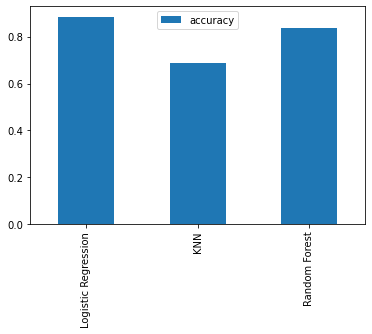

In [121]:
model_compare = pd.DataFrame ( model_scores , index = ["accuracy"])
model_compare.T.plot.bar();

In [123]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [124]:
# confusion matrix
# classification report
# hyper-parameter tuning

Now we've got a baseline model.. and we know a model's first predictions aren't alwaus what we should based our next steps off.
What should dp?

##### Let's look at the following:
###### These are part of any machine learning model
* Hyper-parameter tuning
* Feature importance
###### These are specific to classification
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the curve (AUC)

#### Hyper-parameter tuning

In [138]:
# Let's tune KNN

train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range (1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)     # .set_params is used for adjusting parameters
    
    # fit the algorithm
    knn.fit(x_train , y_train)
    
    # update the training scores list
    train_scores.append(knn.score(x_train , y_train))
    
    # update the test scores list
    test_scores.append(knn.score(x_test, y_test))


In [139]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [140]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


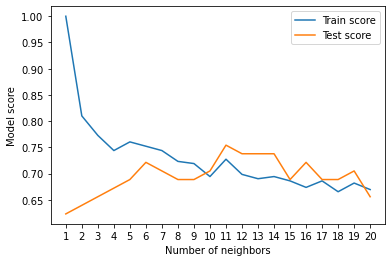

In [143]:
plt.plot(neighbors, train_scores , label ="Train score")
plt.plot(neighbors, test_scores , label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

#### Hyper parameter tuining with RandmizedSearchCV

We're going to tune 
* LogisticRegression()
* RandomForestClassifier()

..... using RandomizedSearchCV

In [155]:
# create a hyper parameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# create a hyper parameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
            "max_depth": [None , 3,5,10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameters grids for each of our models, let's tune them using RandomizedSearchCV..

In [147]:
# Tuning Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression  ( rs is RandomizedSearchCV)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid , 
                                cv = 5 ,
                                n_iter = 20,
                                verbose =True)

# fit random hyperparameter search model for logisticRegression
rs_log_reg.fit( x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [148]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [150]:
rs_log_reg.score(x_test  , y_test)

0.8852459016393442

Now we've tuned LogisticRegression() , let's do the same for RandomForestClassifier()..

In [156]:
#setup random seed
np.random.seed(42)

rs_rf = RandomizedSearchCV (RandomForestClassifier(),
                            param_distributions= rf_grid,
                            cv =5 , 
                            n_iter = 20,
                            verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train ,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [157]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [158]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test , y_test)

0.8688524590163934

### Hyper parameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [160]:
# Different hyperparametes for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# setip grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV (LogisticRegression(),
                           param_grid = log_reg_grid,
                           cv =5 ,
                           verbose=True)

# fit grif  hyperparameter search model
gs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [162]:
# check the best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [163]:
gs_log_reg.score(x_test , y_test)


# as we see there is no improvement. 

0.8852459016393442

#### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great of cross-validation was used where possible

To make comparisions and evaluate our trained model,  first we need to make predictions.

In [166]:
# Make predictions with tuned models:
y_preds = gs_log_reg.predict(x_test)

In [167]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [168]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

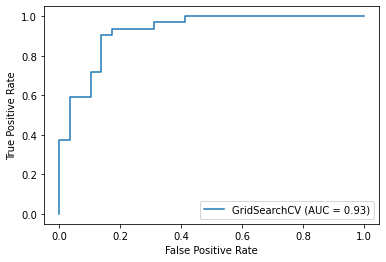

In [169]:
# ROC curve is a way of understanding how your model is performing by comparing the true positive rate to the false positive rate
# perferct model will get AUC score of 1

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg , x_test ,y_test);

# AUC curve is 0.93

In [177]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


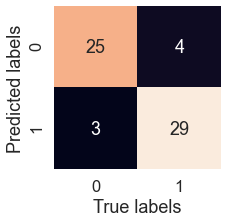

In [179]:
# Plotting confusion matrix 

sns.set(font_scale = 1.5)

def plot_conf_mat(y_test , y_preds):
    """
    PLots a nice looking confusion matrix using Seaborn's hearmap()
    """
    
    fig , ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                     annot = True ,
                     cbar = False)
    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve m an AUC metric and a confusion matrix , let's get a classification report as well as cross-validated precision , recall and f1-socre.

* Precision is related to false positive
* Recall is relate to false negative
* F1 is combination of precision and recall
* Support is number of samples each metric was calculated on

In [181]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [182]:
# check best hyper-parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [183]:
# creating a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [184]:
# cross validated accuracy

cv_acc = cross_val_score(clf , x , y , cv =5 , scoring= "accuracy" )

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [187]:
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [188]:
# cross validated precision
cv_precision =  cross_val_score(clf , x , y , cv =5 , scoring= "precision" )

cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [189]:
# cross validated recall

cv_recall =  cross_val_score(clf , x , y , cv =5 , scoring= "recall" )

cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [190]:
# cross validated f1-score

cv_f1 =  cross_val_score(clf , x , y , cv =5 , scoring= "f1" )

cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

In [193]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "f1-score" : cv_f1},
                         index = [0])

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

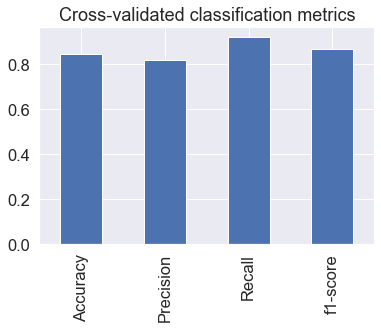

In [199]:
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend=False)

#### Feature Importance

Feature importance is another way of asking, " whcich features contributed most to the outcomes of the model and how did they contribute"?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model....

In [200]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [203]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418, 
                        solver = "liblinear")

clf.fit(x_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [204]:
# check coef_ attribute
# this shows how each of the attributes ( independent variables ) contribute to the labels ( dependent attribute/target )

clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [205]:
# match coef's of features to columns

feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

# This shows that how much each of these contribute for predicting the target variable

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [206]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:title={'center':'Feature Importance'}>

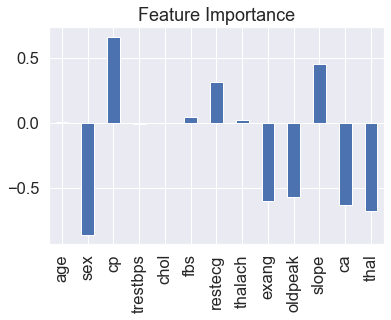

In [208]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend = False)

# This show similar result as correlation matrix

In [209]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [210]:
pd.crosstab(df["slope"] , df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* could you collect more data?
* could you try a better model? Like CatBoost or XGBoost?
* could you improve the current models? (beyond what we've done so far)


* If your model is good enough (you have hit your evaluation metric) how would you export it and share with others?

# END 